# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, vector_size=10,window=3)
print(model)


Word2Vec(vocab=15, vector_size=10, alpha=0.025)


In [3]:
words = list(model.wv.key_to_index)
print(words)



['example', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'text', 'of', 'first', 'a']


In [4]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.09604949  0.05007555 -0.08759888 -0.04390896 -0.00036679 -0.00297186
 -0.07661466  0.09617318  0.04981884  0.09234031]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, vector_size=10, alpha=0.025)


In [6]:
X = model.wv[new_model.wv.key_to_index]

In [7]:
X.shape

(15, 10)

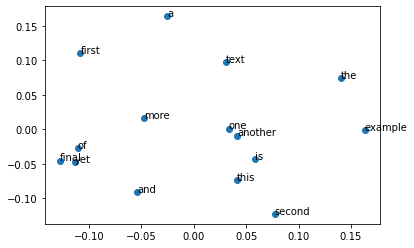

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [9]:
import gensim.downloader as api

In [10]:
corpus = api.load('text8')

In [11]:
type(corpus)


text8.Dataset

In [12]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [13]:
model8.wv['tree']

array([-1.1467129 , -0.16776904,  1.3401015 , -1.1064574 ,  0.3041793 ,
        1.1152269 , -0.49878436, -1.873218  , -1.9708015 , -2.207309  ,
       -0.7250359 , -2.9031184 ,  0.9418302 ,  1.5665663 , -1.8536464 ,
        3.2396448 ,  2.770278  , -0.8505427 ,  0.5696679 ,  0.18812385,
       -0.379029  , -0.17826502,  0.10605957, -1.3705235 , -0.52364784,
       -0.45512846, -0.5547123 ,  0.77529544, -0.22472338,  0.14640485,
        1.7031797 ,  0.6074353 ,  0.5389107 , -0.64423174,  0.48824355,
        0.76557016,  1.6341436 ,  1.0250065 , -0.64480126,  1.0213398 ,
        0.31186566, -1.0855435 , -1.9944627 ,  0.71958894,  1.819513  ,
       -0.6534227 ,  1.5233194 , -0.7500523 , -0.7722484 ,  0.8627042 ,
       -1.5954044 ,  1.015625  , -0.04828108,  2.3158844 , -0.94680923,
       -1.127933  , -0.32958698,  0.17397495, -2.1933808 , -0.54507744,
       -0.27724501, -0.9018106 , -1.613147  ,  2.480919  ,  0.50644654,
       -0.5676762 , -1.1530375 , -2.4595292 , -0.29086533, -1.55

In [14]:
print(model8.wv.most_similar('tree'))

[('trees', 0.7130633592605591), ('leaf', 0.6996258497238159), ('fruit', 0.6304346323013306), ('flower', 0.6301509141921997), ('bird', 0.6226281523704529), ('bark', 0.620945930480957), ('calf', 0.6128720641136169), ('sap', 0.60650634765625), ('cactus', 0.6047248244285583), ('tooth', 0.5985922813415527)]


In [15]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [16]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6678013801574707), ('princess', 0.6208376884460449), ('elizabeth', 0.6116613149642944)]


In [17]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('mclaren', 0.6766727566719055), ('chevrolet', 0.6559633016586304), ('scuderia', 0.6519873142242432)]


In [18]:
print(model8.wv.most_similar(positive=['france', 'venice'], negative=['italy'], topn=3))


[('bologna', 0.7581573128700256), ('toulouse', 0.7570486068725586), ('paris', 0.7516875863075256)]


In [19]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('dj', 0.6649004817008972), ('promotional', 0.5842692852020264), ('unplugged', 0.57940274477005)]


In [20]:
model8.wv.most_similar(['apple','orange'])

[('iie', 0.6616296172142029),
 ('mcintosh', 0.636538565158844),
 ('jaguar', 0.6284868717193604),
 ('logo', 0.620890736579895),
 ('rum', 0.6114639043807983),
 ('coleco', 0.6058065295219421),
 ('nes', 0.6022999882698059),
 ('lotus', 0.601905345916748),
 ('nintendo', 0.5978764295578003),
 ('mazda', 0.5899168252944946)]

##  Loading pre-trained models

In [21]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [22]:
print(model.most_similar('tree'))

[('trees', 0.829312264919281), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917218565940857), ('willow_tree', 0.6845874786376953), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498864173889), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547872424125671)]


In [23]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723939061164856), ('royalists', 0.45945391058921814)]


In [24]:
print(model.most_similar(positive=['italy', 'beatles'], negative=['england'], topn=3))


[('radiohead', 0.5180865526199341), ('metallica', 0.511135458946228), ('quinto', 0.5088788866996765)]


### Glove

In [21]:
# https://nlp.stanford.edu/projects/glove/

# converting format from glove to w2v

#from gensim.scripts.glove2word2vec import glove2word2vec
#glove_input_file = 'glove.42B.300d.txt'
#word2vec_output_file = 'glove.42B.300d.txt.word2vec'
#glove2word2vec(glove_input_file, word2vec_output_file)

/tmp/ipykernel_1583278/2104477813.py:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(1917494, 300)

In [22]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7833545207977295)]


In [23]:
print(model.most_similar('tree'))

[('trees', 0.834145724773407), ('branches', 0.6109411716461182), ('leaf', 0.6104052066802979), ('pine', 0.6100702285766602), ('forest', 0.5894954800605774), ('garden', 0.5828163623809814), ('vine', 0.5765968561172485), ('branch', 0.5740603804588318), ('flower', 0.5736389756202698), ('willow', 0.5727055668830872)]
